<a href="https://colab.research.google.com/github/sambitdash/EVA-2/blob/master/Session-5/Session-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(XI_train, y_train), (XI_test, y_test) = mnist.load_data()
X_train, X_test = XI_train, XI_test


(60000, 28, 28)


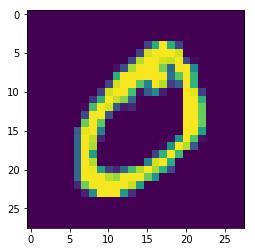

In [41]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


X_mean = np.mean(X_train, axis=0)
X_var  = np.var(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_std = np.clip(X_std, 1.0/255, 1.0)

X_train = X_train - X_mean
X_test  = X_test  - X_mean

X_train = np.divide(X_train, X_std)
X_test  = np.divide(X_test, X_std)


In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [46]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
from keras.layers import Activation
from keras import regularizers

model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1), kernel_regularizer=regularizers.l2(0.001))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.001)))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4, kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Co

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_29 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_30 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_30 (Activation)   (None, 24, 24, 32)        0         
__________

In [48]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

mcp=ModelCheckpoint("/content/drive/My Drive/eip-2/model.{epoch:03d}-{val_loss:.2f}.hdf5", 
                    monitor='val_acc', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1), mcp])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 12s 194us/step - loss: 0.7422 - acc: 0.8177 - val_loss: 0.3492 - val_acc: 0.9678

Epoch 00001: val_acc improved from -inf to 0.96780, saving model to /content/drive/My Drive/eip-2/model.001-0.35.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 123us/step - loss: 0.3448 - acc: 0.9195 - val_loss: 0.1866 - val_acc: 0.9790

Epoch 00002: val_acc improved from 0.96780 to 0.97900, saving model to /content/drive/My Drive/eip-2/model.002-0.19.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 122us/step - loss: 0.2677 - acc: 0.9367 - val_loss: 0.1159 - val_acc: 0.9882

Epoch 00003: val_acc improved from 0.97900 to 0.98820, saving model to /con

In [49]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03464589076042175, 0.9943]


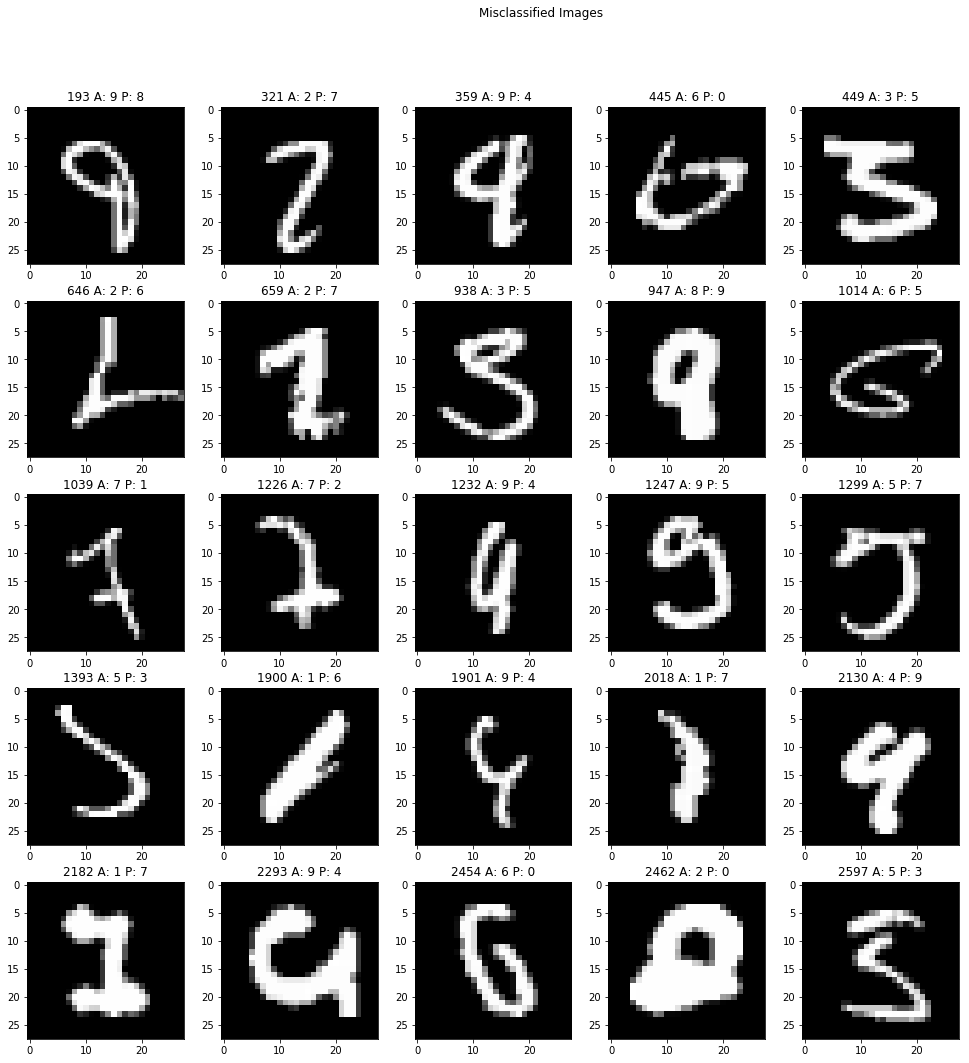

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline
y_pred = model.predict(X_test)
np.set_printoptions(precision=1, suppress=True)


i = 0
fig, ax = plt.subplots(5, 5, figsize = (15, 15))
fig.suptitle('Misclassified Images')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for (x, y) in [(i, j) for i in range(5) for j in range(5)]:
  while i < 10000 and np.argmax(y_pred[i, :]) == y_test[i]:
    i += 1
  ax[x, y].imshow(XI_test[i], cmap='gray')
  ax[x, y].set_title('%d A: %d P: %d' % (i, y_test[i], np.argmax(y_pred[i, :])))
  i += 1 
  if i >= 10000:
    break